<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/1_ClasificacionMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neuronales MLP para Clasificación**

Basado en Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition. Aurélien Géron. 2019

Librerías requeridas

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


**Funciones de Activación**

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):#Rectified Linear Unit
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [3]:
#La función sigmoide aplana la entrada en un rango entre 0 y 1, útil en problemas de clasificación binaria.
#La función ReLU devuelve 0 para valores negativos y el mismo valor para valores positivos. Es una de las funciones de activación más populares en la práctica debido a su eficiencia y buen desempeño.

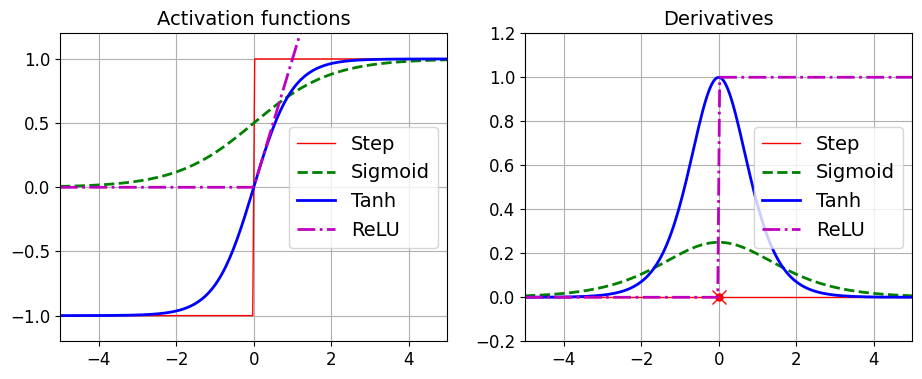

In [4]:
z = np.linspace(-5, 5, 200)#genera 200 numeros entre -5 y 5

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)

plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

## **MLPs y Clasificación**

In [5]:
import tensorflow as tf
from tensorflow import keras
#TensorFlow es una biblioteca de software de código abierto desarrollada por Google para realizar cálculos numéricos
#Keras, por otro lado, es una API de alto nivel para construir y entrenar modelos de aprendizaje profundo.

In [6]:
tf.__version__#para comprobar que version de tensorflow se esta usando

'2.15.0'

In [7]:
#keras.__version__

**Dataset: MNIST Fashion**

El conjunto de datos MNIST de moda está incorporado en Keras, este conjunto de datos es un conjunto de 60,000 imágenes de dígitos escritos a mano para entrenamiento y 10,000 imágenes adicionales para pruebas, cada imagen tiene una resolución de 28x28 píxeles y está en escala de grises.

El conjunto de datos ya está dividido entre un conjunto de entrenamiento y un conjunto de prueba, pero puede resultar útil dividir aún más el conjunto de entrenamiento para tener un conjunto de validación:

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()#cargamos el conjunto de datos.

4422102/4422102 [==============================] - 0s 0us/step


El conjunto de entrenamiento contiene 60.000 imágenes en escala de grises, cada una de 28x28 píxeles:


In [9]:
X_train_full.shape#hay 60 mil imagaenes en el conjunto de entrenamiento
#osea 60000 mil matrices de tamaño 28x28

(60000, 28, 28)

In [10]:
matriz_tridimensional = np.random.rand(2, 5, 5)
matriz_tridimensional

array([[[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
        [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
        [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497],
        [0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
        [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998]],

       [[0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
        [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203],
        [0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
        [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998],
        [0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446]]])

In [11]:
matriz_tridimensional[1][0][1]#por ser una matriz es cero todo osea el primer indice
#el segundo indice tomemos cada lista como 0,1,2,4
#el tercer indice la posicion que ocupa cada numero en la lista

0.19967378215835974

In [12]:
matriz_tridimensional[1]#arroja la con posicion 1

array([[0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
       [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203],
       [0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
       [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998],
       [0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446]])

In [13]:
y_train_full.shape

(60000,)

Cada intensidad de píxel se representa como un byte (0 a 255):

In [14]:
X_train_full.dtype

dtype('uint8')

In [15]:
X_train_full[1][0][15]#es el valor de la matriz en posicion 1, posicion 0(lista 1) de esa matriz y
#de esa lista la posicion 15

43

Dividamos el conjunto de entrenamiento completo en un conjunto de validación (los primeros 5000) y un conjunto de entrenamiento 55000 (más pequeño). También reducimos las intensidades de los píxeles al rango 0-1 y las convertimos en flotantes, dividiéndolas por 255.

In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.#conjunto entrenamiento y validacion
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]#variable tarjet tambien separamos
X_test = X_test / 255.

Se puede mostrar una imagen usando la función imshow() de Matplotlib, con un mapa de color 'binario':

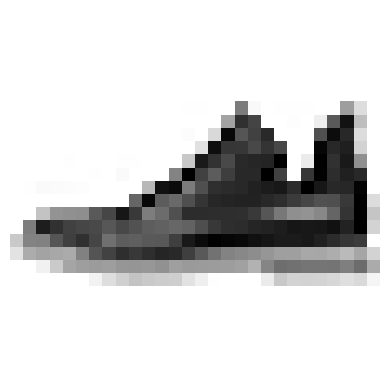

In [33]:
plt.imshow(X_train[40], cmap="binary")
plt.axis('off')
plt.show()

Las etiquetas son los ID de clase (representados como uint8), del 0 al 9:

In [18]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [19]:
len(y_train)#comienza de cero hasta 54999

55000

Aquí están los nombres de clases correspondientes:

In [23]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

La primera imagen del conjunto de entrenamiento es un abrigo:

In [24]:
class_names[y_train[0]]#primera

'Coat'

In [25]:
class_names[y_train[54999]]#ultima

'Sandal'

In [26]:
class_names[y_train[np.random.randint(0, 55000)]]

'Dress'

El conjunto de validación contiene 5000 imágenes y el conjunto de prueba contiene 10 000 imágenes y el conjunto de entrenamiento 55000:

In [27]:
X_valid.shape

(5000, 28, 28)

In [28]:
X_train.shape#se tiene 55,000 imagenes,cada uno representado por una matriz de 28 filas y 28 columnas

(55000, 28, 28)

In [29]:
X_test.shape

(10000, 28, 28)

In [30]:
y_train.shape

(55000,)

Una muestra de las imágenes del conjunto de datos:

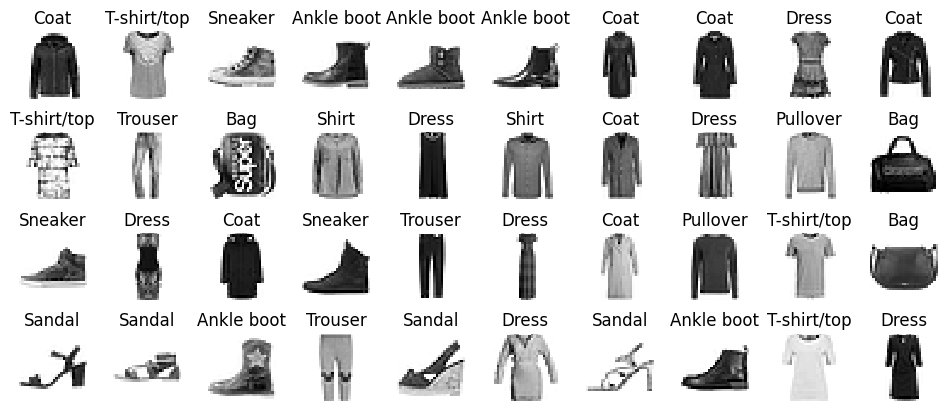

In [31]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):#0,1,2,3
    for col in range(n_cols):#0,1,2....9
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [34]:
#EJEMPLO DE APLANAR UNA MATRIZ
ri=X_train.flatten()#SON 55000 MATRICES DE TAMAÑO 28X28
len(ri)#55000x28x28
55000*28*28

43120000

##**Construcción del Modelo Secuencial**

Una forma:

In [36]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))#todas las matrices van a una sola fila
model.add(keras.layers.Dense(300, activation="relu"))#cada capa densa tiene su matriz de pesos y vallas
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))#la sorfmax transforma los 10 numeros de cero a 1

- La primera línea crea un modelo Sequential. La forma más simple en Keras para definir Redes Neuronales compuestas de un apilado de capas conectadas secuencialmente.
- La capa ``Flatten`` tiene el papel de convertircada imagen en un arreglo de 1D: recibe datos X, y hace un ``X.reshape(-1,28*28)``. Esta capa no tiene parámetros. Dado que es la primera capa debe especificarse el ``input_shape``, que no incluye el tamaño de batch.
- Se añade una oculta ``Dense`` con 300 neuronas. Usará ReLU como función de activación. Cada capa ``Dense``tiene su propia matriz de pesos y también su vector de bias (una por cada neurona). Cuando recibe datos de entrada calcula $h_{W,b}(X) = \phi(XW+b)$
- Se añade una segunda capa oculta ``Dense`` con 100 neuronas y ReLU.
- Finalmenente se añade una capa densa de salida, con 10 neuronas (una por clase),y se usa la función de activación softmax.

In [37]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Otra forma:

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [39]:
model.layers

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
784*300#la primera capa oculta tiene 23520 pesos

235200

In [42]:
#Aparece none al lado de 784, representa cuantos ejemplos se le va enviar para entrenar, todavia
#no se sabe cuanto de va enviar es por eso el none
#784x300=235200(pesos)+300(BAYAS) la suma da un total 235500
#hay 3 matrices la primera 784x300=235200, segunda 300x100=30000(100 vallas), tercera 100x10=1000(10 vallas)


``sumary()`` despliega todas las capas del modelo, incluyendo su nombre, su dimensión de salida (``None`` el tamaño del batch que puede ser cualquiera), y su número de parámetros.

Número de Parámetros:
- En general las capas densas tienen muchos parámetros.
- La primera capa oculta tiene $784\times 300$ pesos, más 300 términos de bias, lo que totaliza 235500 parámetros.
- Esto puede provocar overfitting.

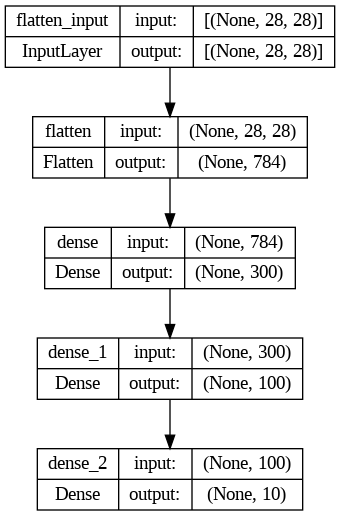

In [44]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [46]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [47]:
model.get_layer(hidden1.name) is hidden1

True

Todos los parámetros de una capa pueden accesarse usando ``get_weights()`` y ``set_weights()``. Esto incluye los pesos y bias en capas densas.

In [ ]:
#el set_weigths no permite colocar pesos para tranferlearning

In [48]:
weights, biases = hidden1.get_weights()

In [49]:
weights

array([[-0.02602322, -0.01114149, -0.03275417, ...,  0.02263954,
        -0.04913366, -0.05441438],
       [ 0.03004271,  0.05114335,  0.03027906, ...,  0.01821975,
         0.05337888,  0.00546936],
       [-0.06658015,  0.00420222, -0.01589675, ..., -0.05793808,
         0.01093645, -0.0330196 ],
       ...,
       [ 0.05309403,  0.02676538,  0.01648774, ...,  0.03199661,
         0.05441044,  0.05369824],
       [-0.02235197, -0.060784  ,  0.01635075, ...,  0.05445127,
         0.02521968, -0.00132784],
       [ 0.02511536,  0.0229784 ,  0.02560326, ...,  0.02581191,
        -0.01100164,  0.04131155]], dtype=float32)

In [50]:
weights.shape # tiene 784 listas de 300 elementos cada una

(784, 300)

In [66]:
len(weights[0])#tamaño de elementos de una fila

300

In [67]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Los pesos son iniciados con valores aleatorios, los bias con ceros. Se puede alterar esto usando el método ``kernel_initializer`` o ``bias_initializer`` al crear la capa.

In [68]:
biases.shape#se puede iniciliar con los bayas ceros pero no los pesos

(300,)

##**Compilación del Modelo**

In [69]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
#accuracy proporcion de clases correctamente clasificadas

En el método ``compile()`` se especifica principalmente la función de costo, el optimizador y métricas, entre otros parámetros.

- Se usa ``sparse_categorical_crossentropy`` porque se tiene etiquetas en las clases (índices de 0 a 9).
- Si tuvieramos codificaciones one_hot (por ejemplo la clase 3 codificada como [0, 0, 0, 1, 0, 0, 0, 0, 0]), entonces se usaría ``categorical_crossentropy``.
- Si estuvieramos haciendo clasificación binaria, la función de activación en la capa de salida seria "sigmoid" y la función de pérdida usada sería ``binary_crossentropy``.
- ``sgd`` indica quee entrenará el modelo usando Stochastic Gradient Descent. En ese sentido es importante tal vez hacer tuning del ``learning_rate``, que por defecti es ``lr=0.01``.
- La métrica usada para entrenamiento y validación será ``accuracy``, que en español se traduce en ``exactitud.``



##**Aprendizaje y entrenamiento**

In [70]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))
#epochs=30, 30 veces pasan los 55000 datos

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7234 - accuracy: 0.7654 - val_loss: 0.5175 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4897 - accuracy: 0.8298 - val_loss: 0.4367 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4436 - accuracy: 0.8437 - val_loss: 0.5262 - val_accuracy: 0.8028
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4171 - accuracy: 0.8544 - val_loss: 0.3959 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3980 - accuracy: 0.8601 - val_loss: 0.3777 - val_accuracy: 0.8658
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3792 - accuracy: 0.8660 - val_loss: 0.3721 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3663 - accuracy: 0.8705 - val_loss: 0.3678 - val_accu

- Es necesario pasar las características de entrada (``X_train``) y clases objetivo (``y_train``), así como el número de épocas. También se pasa el conjunto de validación (no obligatorio).
- Otra forma de definir el conjunto de validación seria usando ``validation_split=0.1``, que indica que el 10\% será usado para validación.
- A cada época durante el entrenamiento, se despliega el número de instancias procesadas, el tiempo promedio por ejemplo, el ``loss`` y ``accuracy``, para el conjunto de entrenamiento y validación.
- Se puede observar que el ``loss`` va disminuyendo, lo que es bueno. Asimismo el accuracy en validación llega a 89\% después de 30 épocas, y que no está muy lejos del valor accuracy en entrenamiento. No parece haber overfitting.

- Se puede usar el argumento ``class_weight`` al llamar el método ``fit()``, que permite darle un peso diferente a cada clase (atenuar el desbalanceo). Estos pesos serán usados durante el cálculo del costo.


In [71]:
#no parece haber overfiting porque la exactitud en el conjunto de entrenamiento y validadcion son
#cercanas

In [72]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

El objeto ``history``, retornado por fit, permite analizar el resultado de las métricas.

In [74]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [75]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

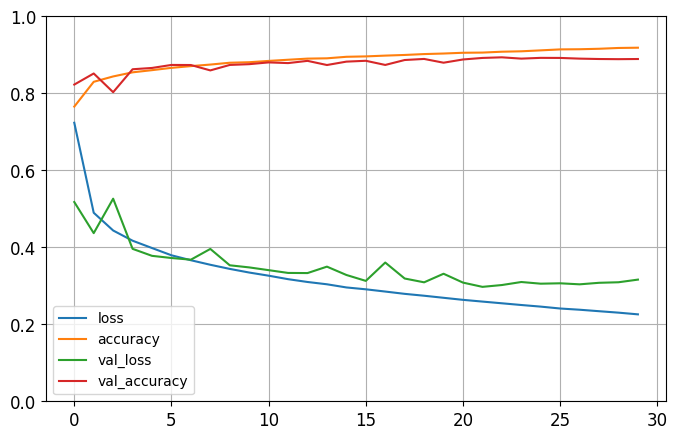

In [77]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Análisis:

- Se puede ver que tanto accuracy en validación y entrenamiento se incrementan durante el entrenamiento, mientras que el loss de validación y entrenamiento disminuyen.
- Las curvas de validación y entrenamiento son cercanas, lo que indica poco overfitting.
- Es usual que el desempeño del conjunto de entrenamiento sea mejor a la larga. En este caso más entrenamiento puede llevar a un accuracy de 89.4 \% en validación.
- Si el desempeño no es el esperado se debe ajustar hiperparámetros: ``learning_rate``, capas ocultas, número de neuronas por capa, funciones de activación, batch (32 por defecto), entre otros.



In [79]:
#los parametros en una mlp son los pesos y los bayas
#los hiperparametros puede ser el numero de neuronas,el numero de capas y ratio de aprendizaje y
#tambien la funcion de activacion

In [80]:
model.evaluate(X_test, y_test)#el conjunto de prueba solo se usa para reportar el desempeño final


313/313 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8801


[0.3435029089450836, 0.8801000118255615]

**Advertencia:**

- Es común tener un desempeño inferior en el conjunto de prueba (debido al afinamiento en el conjunto de validación).
- Se debe **evitar** hacer un afinamiento de los hiperparámetros sobre el conjunto de prueba, esto haría que mostraramos resultados de generalización muy optimistas.

Predicciones sobre datos nuevos

In [82]:
X_new = X_test[:3]#consideramos las 3 primeras figuras de prueba
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 27ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [85]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)#np.argmax entrega el indice del mayor valor de la lista
y_pred

1/1 [==============================] - 0s 28ms/step


array([9, 2, 1])

In [86]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [89]:
y_new = y_test[:3]#los 3 primeros figuras son 9,2,1
y_new#lo que predijo es lo mismo que realmente se tiene

array([9, 2, 1], dtype=uint8)

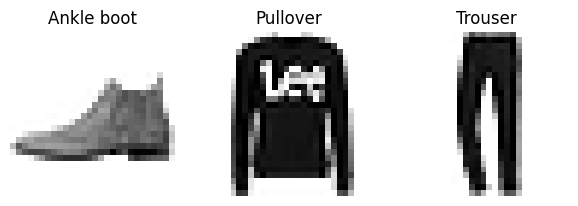

In [90]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()